Author: Ashutosh Kumar Singh
Description: This code generates the LFSR with the expression $x_9$ XOR $x_2$. The 10 bit PRBS has a repetition period of 1024 outputs. One PRBS is randomly selected and the stem plot is generated. The stem plot is realised into an analogue waveform with finite (exponential) rise and fall time. The constant tau can be changed in the program. It is normalised with the bit size. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
fontsize = 16

In [28]:
seed = 0x02
data = seed
i = 0
prbs10=[]

while True:
    newbit = ((data>>9)^(data>>2)) & 1
    data = ((data << 1) | newbit) & 0x03ff
    prbs10.append(format(data, '010b'))
    i= i +1
    if data == seed:
        break
print("Repetition period: ",i)

Repetition period:  1023


In [29]:
digit = random.randint(0,1023)              # Random choice from the generated PRBS
#Conversion of PRBS output into an array of 10
data=[]
for i in list(prbs10[digit]):
    data.append(int(i))
print(data)

[1, 1, 0, 0, 1, 1, 1, 1, 1, 1]


Tau is the time constant, where 1 corresponds to time constant equal to 1 bit wide. 

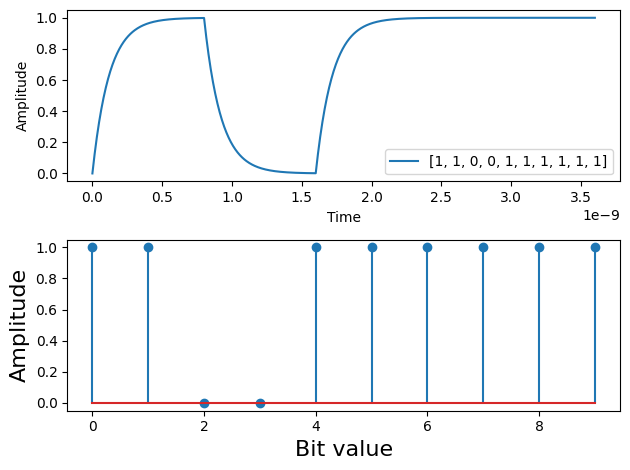

In [30]:
tau = 0.3   ## Time constant
x = np.linspace(0, 9, 901)
t=0
yplot=[]
initial_bit=data[0]
if initial_bit==0:      # Setting the intial amplitude 
    amp=0
elif initial_bit ==1:
    amp=1

current_bit=initial_bit 

for i in x:
    if current_bit!=data[int(i)]:
        current_bit=data[int(i)]
        if current_bit == 1:            # The next time should resurface from the last amplitude value
            t=-np.log(1-amp)*tau        
        else:
            t=-np.log(amp)*tau
  
    if current_bit == 1:                # Calculating rising edge
        amp=1-np.exp(-t/tau)

    else:                               # Calculating falling edge
        amp=np.exp(-t/tau)
    yplot.append(amp)
    t=t+0.01                            #increment in time step. 
    
plt.subplot(2,1,1)
plt.plot(x*400*10**(-12),yplot, label = data)  ## Multiplication by 400ps to get 2.5GBps rate
plt.legend()
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.subplot(2,1,2)

plt.stem(data, label = data)
plt.ylabel("Amplitude", fontsize=fontsize)
plt.xlabel("Bit value", fontsize= fontsize)
plt.tight_layout()
plt.show()

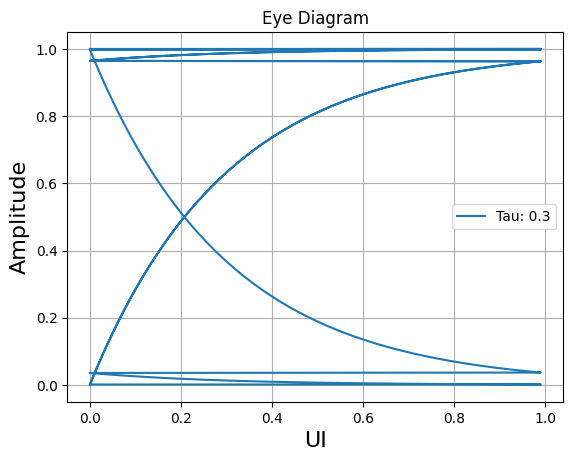

In [31]:
plt.plot(x%1, yplot, label= "Tau: {}".format(tau))
plt.xlabel("UI", fontsize= fontsize)
plt.ylabel("Amplitude", fontsize=fontsize)
plt.title("Eye Diagram")
plt.grid()
plt.legend()
plt.show()
# plt.savefig("Tau_2.2.png", dpi = 400)